<a href="https://colab.research.google.com/github/mariemGuermazi/30-Days-Of-Python/blob/master/Damage_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("GPU disponible :", tf.config.list_physical_devices("GPU"))

GPU disponible : []


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="86x5k73nSrlMNlB7vjMO")
project = rf.workspace("mariem-4lyig").project("container_damage-izjqt")
version = project.version(1)
dataset = version.download("folder")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os

os.listdir("/content")

['.config', 'Container_Damage-1', 'sample_data']

In [ ]:
os.listdir("/content/Container_Damage-1")

[]

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds_raw = image_dataset_from_directory(
    "Container_Damage-1/train",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds_raw = image_dataset_from_directory(
    "Container_Damage-1/valid",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

test_ds_raw = image_dataset_from_directory(
    "Container_Damage-1/test",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Récupérer l’ordre exact des classes
class_names = train_ds_raw.class_names
print("Ordre des classes :", class_names)



NotFoundError: Could not find directory Container_Damage-1/train

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


def preprocess(images, labels):
    images = preprocess_input(images)
    return images, labels

train_ds = train_ds_raw.map(preprocess)
val_ds = val_ds_raw.map(preprocess)
test_ds = test_ds_raw.map(preprocess)


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [ ]:
from tensorflow.keras import models

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False


In [ ]:
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5296 - loss: 0.9680 - val_accuracy: 0.5847 - val_loss: 0.6489
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6127 - loss: 0.6906 - val_accuracy: 0.7542 - val_loss: 0.5289
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7320 - loss: 0.5369 - val_accuracy: 0.7797 - val_loss: 0.4785
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7969 - loss: 0.4778 - val_accuracy: 0.8136 - val_loss: 0.4443
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7888 - loss: 0.4711 - val_accuracy: 0.7881 - val_loss: 0.4686
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8394 - loss: 0.4085 - val_accuracy: 0.8051 - val_loss: 0.4149
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8000 - loss: 0.4346 - val_accuracy: 0.7797 - val_loss: 0.4402
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8345 - loss: 0.3796 - val_accuracy: 0.8305 - val_loss:

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8159 - loss: 0.3904 - val_accuracy: 0.8136 - val_loss: 0.3734
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8493 - loss: 0.3747 - val_accuracy: 0.8305 - val_loss: 0.3772
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8374 - loss: 0.3519 - val_accuracy: 0.8305 - val_loss: 0.3791
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8065 - loss: 0.3717 - val_accuracy: 0.8220 - val_loss: 0.3812
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8180 - loss: 0.4085 - val_accuracy: 0.8220 - val_loss: 0.3772


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - accuracy: 0.6866 - loss: 0.6438
Test loss: 0.6212
Test accuracy: 0.7018


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_prob = model.predict(test_ds)
y_pred = np.argmax(y_pred_prob, axis=1)

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
              precision    recall  f1-score   support

     damaged       0.54      0.23      0.33        30
        good       0.48      0.78      0.59        27

    accuracy                           0.49        57
   macro avg       0.51      0.51      0.46        57
weighted avg       0.51      0.49      0.45        57



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


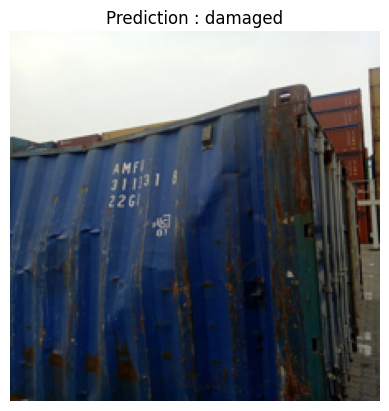

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/DMG20190211032414505341928129.jpg"  # remplace par ton image
img = Image.open(img_path).resize(IMAGE_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]

plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction : {pred_class}")
plt.show()